# EDA For the Office

In this project, we will take a look at a dataset of The Office episodes, and try to
understand how the popularity and quality of the series varied over time. 

It is worth knowing that the dataset was downloaded from kaggle.

First off, we will need to import the necessary packages and libraries to help us with our data exploration. And the following in the below cell are crucial!

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

The dataset is stored in a CSV file in the root of our project. It's called 'the_office_series.csv'. We will now import it in a pandas DataFrame called `df`.

In [24]:
df = pd.read_csv('the_office_series.csv')

It is always a good practice to have a sneak peek at the first few rows of the dataframe after loading. We will use the head() to accomplish this.

In [25]:
df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


The first part of our work is to clean the DataFrame and make it suitable for analysis.

From a first galance, we could see a few things of interest.
- A column named 'Unnamed: 0'
- NaN values in the `GuestStars` column

But before we deal with this, let's first look at the columns we have in the dataframe.

In [26]:
df.columns

Index(['Unnamed: 0', 'Season', 'EpisodeTitle', 'About', 'Ratings', 'Votes',
       'Viewership', 'Duration', 'Date', 'GuestStars', 'Director', 'Writers'],
      dtype='object')

From the first few rows of the dataframe, we see that column `Unnamed: 0` is kind of useless as it has the same values as the as the index.
In that case, it is best to drop that column.

In [27]:
df.drop(columns='Unnamed: 0', inplace=True)

We also listed above that the column `GuestStars` has `NaN` values. The questions now are: 
- Are those five rows the only missing values or are there more?
- Are there any other fields with missing data?
- Is there enough missing data in a column to warrant it to be dropped?

Well, the below cell will give us an insight into this and give us the necessary answers.

In [28]:
df.isnull().sum()

Season            0
EpisodeTitle      0
About             0
Ratings           0
Votes             0
Viewership        0
Duration          0
Date              0
GuestStars      159
Director          0
Writers           0
dtype: int64

The good news is, only one column in the dataframe has missing values. But that column has about 85% of its data missing.
Standard practice recommends that a field needs to be dropped if 75% or more of its data is missing.

So we will drop this column!

In [29]:
df.drop(columns='GuestStars', inplace=True)

In [30]:
df.shape

(188, 10)

Our dataframe now has 188 observations and 10 fields.

Another important thing we normally do is to check the general information of the dataframe. The `info` method comes in handy here.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        188 non-null    int64  
 1   EpisodeTitle  188 non-null    object 
 2   About         188 non-null    object 
 3   Ratings       188 non-null    float64
 4   Votes         188 non-null    int64  
 5   Viewership    188 non-null    float64
 6   Duration      188 non-null    int64  
 7   Date          188 non-null    object 
 8   Director      188 non-null    object 
 9   Writers       188 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 14.8+ KB


From the output above, it's note worthy to double check the `Date` field. Its data type is `object` even though the values are in a date format.

Since we want to understand how the popularity and quality of the series varied over time, it will be better to have this field converted to datetime. And that is waht we are doing next.

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

Let's have another look at the head of the dataframe.

In [33]:
df.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,Director,Writers
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,Ken Kwapis,B. J. Novak
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,Bryan Gordon,Michael Schur
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,Greg Daniels,Greg Daniels


The fact that we are interested in the variation of popularity and quality over time, making the dataframe a timeseries is suitable. So we will set the index to the `Date` column.

In [34]:
df.set_index('Date', inplace=True)

Again, we will take another look at the modified dataframe.

In [35]:
df.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Director,Writers
Date,,,,,,,,,
2005-03-24,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
2005-03-29,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,Ken Kwapis,B. J. Novak
2005-04-05,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,Ken Whittingham,Paul Lieberstein
2005-04-12,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,Bryan Gordon,Michael Schur
2005-04-19,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,Greg Daniels,Greg Daniels


## Exploratory Data Analysis

Now that we are done with the data cleaning phase, it's time to do some exploration to infer some insights and answer the ultimate question of the project.
But we will start by looking at the summary statistics of the numerical fields of the dataframe.

In [37]:
df.describe()

,Season,Ratings,Votes,Viewership,Duration
count,188.000000,188.000000,188.000000,188.000000,188.000000
mean,5.468085,8.237234,2838.228723,7.246330,27.053191
std,2.386245,0.589930,1063.165290,2.066012,6.937254
min,1.000000,6.600000,1832.000000,3.250000,19.000000
25%,3.000000,7.800000,2187.750000,5.990000,22.000000
50%,6.000000,8.200000,2614.000000,7.535000,23.000000
75%,7.250000,8.600000,3144.250000,8.425000,30.000000
max,9.000000,9.800000,10515.000000,22.910000,60.000000


From the summary statistics, everything looks pretty much good.
We will now visualize the trend of the viewership over time.

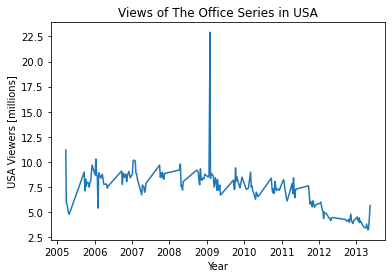

In [48]:
plt.plot(df['Viewership'])
plt.xlabel('Year')
plt.ylabel('USA Viewers [millions]')
plt.title('Views of The Office Series in USA')
plt.show();


The graph above indicates that the viewership in the USA was somewhat relatively constant between 2005 to 2008. But there was a sharp spike in 2009 resulting in with over 22 million views. And there was a downward trend between 2011 and 2013. 

We will now check the ratings and votes over the years.

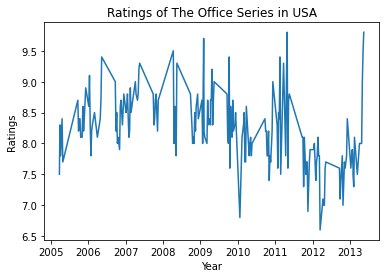

In [50]:
plt.plot(df['Ratings'])
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.title('Ratings of The Office Series in USA')
plt.show();

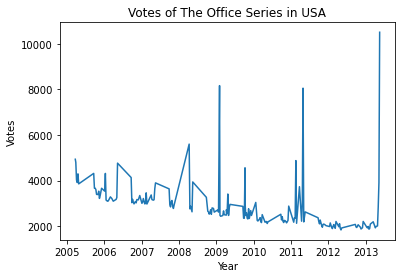

In [52]:
plt.plot(df['Votes'])
plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Votes of The Office Series in USA')
plt.show();

These two graphs do not seem to provide positive relationship with time.

But lets look at the correlation between the numeric fields and plot their relationship.

In [46]:
df.corr()

,Season,Ratings,Votes,Viewership,Duration
Season,1.000000,-0.382447,-0.432233,-0.562827,0.076017
Ratings,-0.382447,1.000000,0.650085,0.486533,0.445092
Votes,-0.432233,0.650085,1.000000,0.468121,0.415316
Viewership,-0.562827,0.486533,0.468121,1.000000,0.315748
Duration,0.076017,0.445092,0.415316,0.315748,1.000000


It looks like `Ratings` and `Votes` have strong positive correlation. We will assertain this with the help of a relplot from the seaborn library.

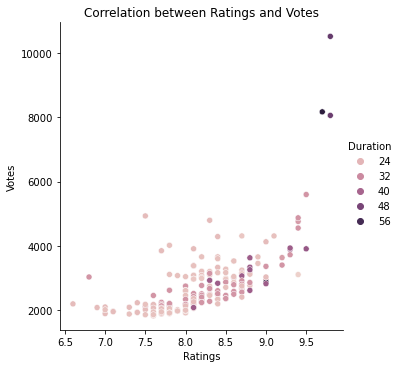

In [54]:
sns.relplot(x='Ratings', y='Votes', data=df, hue='Duration')
plt.title('Correlation between Ratings and Votes')
plt.show();

And Indeed it does!

## Conclusion

Overall, there is no very major changes to the viewership of the `The Office` over time.